# Setups

In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import datetime

In [3]:
os.chdir("/Users/lingchm/Documents/Github/us_sodium_policies")

# Data Collection

In [4]:
# 1. Search tweets by username lookup
# full_archive_search.py

In [5]:
# 2. Get usernames of the tweet that this user replied to: 
# user_lookup.py (in_reply_to_user)

In [6]:
# 3. Get usernames of the tweet that this user retweeted (references):
# 

In [7]:
# 4. Get usernames of the users that this user liked 

# Functions

In [4]:
def plot_counts(df_grouped_year, by="year", columns=['interactions_total','interactions_sodium'],
                axis_labels=["Total number of tweets","Number of sodium tweet interactions"],
                title="Tweet interactions for "):
    # Total tweet counts
    fig,ax = plt.subplots(figsize=(10,5))
    fontsize=16

    # twin object for two different y-axis on the sample plot
    t = max(df_grouped_year[columns[1]])
    ax.bar(df_grouped_year[by], df_grouped_year[columns[1]],color="blue",alpha=0.8)
    #ax2.bar(df_grouped_year.index, df_grouped_year[columns[2]],color="green",
    #        bottom = df_grouped_year[columns[1]])
    ax.set_xlabel(by, fontsize = fontsize)
    ax.set_ylabel(axis_labels[1], color="black",fontsize=fontsize)
    #ax2.set_yticks(np.arange(0, t+5, 2))

    # plot of total tweet counts 
    ax2 = ax.twinx()
    ax2.plot(df_grouped_year[by], df_grouped_year[columns[0]], color="red", alpha=0.6)
    ax2.set_xlabel("date", fontsize = fontsize)
    ax2.set_ylabel(axis_labels[0], color="red", fontsize=fontsize)

    plt.title(title, fontsize = fontsize)
    plt.show()

In [5]:
def plot_counts_YearMonth(df_grouped_year, by="YearMonth", columns=['interactions_total','interactions_sodium'],
                axis_labels=["Total number of tweets","Number of sodium tweet interactions"],
                title="Tweet interactions for "):
    # Total tweet counts
    fig,ax = plt.subplots(figsize=(15,5))
    fontsize=16

    # twin object for two different y-axis on the sample plot
    ax.bar(df_grouped_year[by], df_grouped_year[columns[1]],color="blue",alpha=0.8)
    ax.set_xlabel("date", fontsize = fontsize)
    x = df_grouped_year[by]
    ax.set_xticks(x[::4])
    ax.set_xticklabels(x[::4], rotation=45)
    ax.set_ylabel(axis_labels[1], color="black",fontsize=fontsize)

    # plot of total tweet counts 
    ax2 = ax.twinx()
    ax2.plot(df_grouped_year[by], df_grouped_year[columns[0]], color="red", alpha=0.8)
    ax2.set_xlabel("date", fontsize = fontsize)
    x = df_grouped_year[by]
    #ax2.set_xticks(x[::3])
    #ax2.set_xticklabels(x[::3], rotation=65)
    ax2.set_ylabel(axis_labels[0], color="red", fontsize=fontsize)

    plt.title(title, fontsize = fontsize)
    plt.show()

In [6]:
def get_wordcloud(df_col, title):
    figure_name = plt.figure(figsize=(10,5))
    hashtags = []
    for lst in df_col.values:
        if len(lst) > 2:
            t = lst.strip("'").strip("['").strip("']").strip('"').split("', '")
            hashtags.extend(t)
          
    t = pd.DataFrame()
    t['temp'] = hashtags
    hashtags = t['temp'].str.cat(sep=' ')
    wordcloud = WordCloud(collocations = False, background_color = 'white').generate(hashtags)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

    return hashtags

In [7]:
def preprocess_interactions(df):
    
    df['mentions'] = df['mentions'].astype(str)
    df['reference_usernames'] = df['reference_usernames'].astype(str)
    df['reply_username'] = df['reply_username'].astype(str)

    all_interactions = []
    all_interactions_sodium = []
    all_interactions_children = []
    for i in range(df.shape[0]):
        interactions = []
        if len(df.iloc[i]['mentions']) > 2 and df.iloc[i]['mentions'] != "nan":
            interactions.extend(df.iloc[i]['mentions'].strip("['").strip("']").strip('"').split("', '"))
        if len(df.iloc[i]['reference_usernames']) > 2 and df.iloc[i]['reference_usernames'] != "nan":
            interactions.extend(df.iloc[i]['reference_usernames'].strip("['").strip("']").strip('"').split("', '"))
        if len(df.iloc[i]['reply_username']) > 2 and df.iloc[i]['reply_username'] != "nan":
            interactions.extend(df.iloc[i]['reply_username'].strip("['").strip("']").strip('"').split("', '"))
        # two users can have at most one interaction per tweet 
        interactions = list(set(interactions))
        
        # all interactions for this user 
        all_interactions.extend(interactions)
        
        if df.iloc[i]['contain_sodium'] == 1:
            all_interactions_sodium.extend(interactions)
        if df.iloc[i]['contain_children'] == 1:
            all_interactions_children.extend(interactions)
            
    return all_interactions, all_interactions_sodium, all_interactions_children

'''
def preprocess_interactions(df):
        # get all interactions per user, 
        # get unique interactions per user
        # count overall 
        for i in range(df.shape[0]):
            mention = 
        
        all_mentions = []
        for mention in df[~df['mentions'].isnull()]['mentions'].values:
            if len(mention) > 2:
                all_mentions.extend(mention.strip("['").strip("']").strip('"').split("', '"))
        print("   Total mentions:", len(all_mentions))

        # get list of referenced usernames
        all_references = []
        for reference in df[~df['reference_usernames'].isnull()]['reference_usernames'].values:
            if len(reference) > 2:
                all_references.extend(reference.strip("['").strip("']").strip('"').split("', '"))
        
        print("   Total references:", len(all_references))

        # interaction 
        all_interactions = []
        for reply_username in df[~df['reply_username'].isnull()]['reply_username'].values:
            all_interactions.append(reply_username)
        print("   Total replies:", len(all_interactions))
        all_interactions.extend(all_references)
        all_interactions.extend(all_mentions)
        
        return all_interactions
'''

'\ndef preprocess_interactions(df):\n        # get all interactions per user, \n        # get unique interactions per user\n        # count overall \n        for i in range(df.shape[0]):\n            mention = \n        \n        all_mentions = []\n        for mention in df[~df[\'mentions\'].isnull()][\'mentions\'].values:\n            if len(mention) > 2:\n                all_mentions.extend(mention.strip("[\'").strip("\']").strip(\'"\').split("\', \'"))\n        print("   Total mentions:", len(all_mentions))\n\n        # get list of referenced usernames\n        all_references = []\n        for reference in df[~df[\'reference_usernames\'].isnull()][\'reference_usernames\'].values:\n            if len(reference) > 2:\n                all_references.extend(reference.strip("[\'").strip("\']").strip(\'"\').split("\', \'"))\n        \n        print("   Total references:", len(all_references))\n\n        # interaction \n        all_interactions = []\n        for reply_username in df[~df[\'

In [8]:
import re
keep = [
    "No_added_salt", 
    "actiononsalt", 
    "soloseasalt", 
    "eatlowsodium", 
    'lowsodiumfoods', 
    "sodiumgirl", 
    "sodiumhf",
    'washsalt',
    'cashsalt'
]
keep2 = [
 'switchthesalt',
 'breakupwithsalt',
 'escapethesalt',
 'hiddensalt',
 'noaddedsalt',
 'nosaltplease',
 'nycsalt',
 'reducesalt',
 'restrictsalt',
 'saltintake',
 'saltsubsitute',
 'saltsubstitutes',
 'saltsugfat',
 'saltswitch',
 'shakethesalthabit',
 'sneakysalt',
 'saltweek2018',
 'stopsaltstopstroke',
 'stopthehiddensalt',
 'toomuchsalt',
 'uksaltchallenge',
 'unsalted',
 'spotthesalt',
]
# https://idioms.thefreedictionary.com/salt
# words containing salt https://www.wordgamehelper.com/words-containing/salt
slangs = ["pinch of salt", "dash of salt",
          "worth their salt", "worth his salt", "worth her salt", "worth my salt", "worth your salt",
          "grain of salt", "attic salt", 
          "eat their salt", "dose of the salts", 
          "salt into the wound", "salt in a wound"
         "salt down", "salt away", "salt horse", "salt of the earth", "salt the books",
         "salt-and-pepper", "above the salt", "back to the salt mines", 
         "below the salt", "pound salt", "old salt"]
print(slangs)

def keyword_search(text, keywords):
    for keyword in keywords:
        if re.search(r"\b" + re.escape(keyword) + r"\b", text):
            return True
    return False

def search_sodium(text, keywords=["salt"]):
    
    text = text.lower()
    
    # no other english word contain sodium
    if "sodium" in text:
        return 1

    # remove slang from 
    for slang in slangs:
        text = text.replace(slang, "")

    # if contain middle 
    if (" salt " in text) | ("#salt " in text):
        return 1
    
    if (keyword_search(text, ["salts", "salty", "salted"]) == 1) & (("food" in text) | ("diet" in text) | ("health" in text) | (" eat" in text) | (" meal" in text) | ("intake" in text)):
        return 1
    
    # if contain usernames that have sodium 
    for name in keep:
        if name in text:
            return 1

    # if hashtags 
    if ("lesssalt" in text) | ("lesssalt" in text) | ("lowsalt" in text) | ("highsalt" in text) | ("saltawareness" in text) | ("saltreduction" in text):
        return 1
        
    for name in keep2:
        if name in text:
            return 1

    if keyword_search(text, keywords):
        return 1
    
    return 0


def search_children(text, keywords=["infant", "kid", "kids", "boy", "girl", "boys", "girls"]):
    
    text = text.lower()
    
    # no other english word contain sodium
    if "children" in text or "child" in text:
        return 1

    if "school" in text:
        return 1

    if "toddler" in text:
        return 1
    
    if "teenager" in text:
        return 1
    
    if keyword_search(text, keywords):
        return 1
    
    return 0

['pinch of salt', 'dash of salt', 'worth their salt', 'worth his salt', 'worth her salt', 'worth my salt', 'worth your salt', 'grain of salt', 'attic salt', 'eat their salt', 'dose of the salts', 'salt into the wound', 'salt in a woundsalt down', 'salt away', 'salt horse', 'salt of the earth', 'salt the books', 'salt-and-pepper', 'above the salt', 'back to the salt mines', 'below the salt', 'pound salt', 'old salt']


# Aggregate all data

In [9]:
usernames = {"Public agencies": {"FDA": ["US_FDA", 'FDAfood'],
                                 "DC Department of Health": ["_DCHealth"],
                                 "CDC": ["CDCgov","CDCDirector","CDCFound", "CDC_eHealth"],
                                 "HHS": ["Departmentofh14", "MillionHeartsUS", "HHSGov"],
                                 "NYC Department of Health": ["nycHealthy"],
                                 "PHI": ["PHIdotorg"],
                                 "NIH": ["NIH"],
                                 "USDA": ["USDA", "USDANutrition", "TeamNutrition","NationalCACFP", "SNAP_Ed", "BeAFoodHero","NatWICAssoc"]
                                },
                 "Research and evaluation organization": {
                       "Harvard": ["HarvardChanSPH","HarvardHealth","Harvardmed", "HSPHnutrition"],
                       "John Hokpins": ["HopkinsMedicine","JohnsHopkinsSPH"], 
                       "Univ. Washington": ["uwsph","WUSTLmed"], 
                       "Yale": ["YaleSPH","YaleMed"],
                       "Columbia Univ.": ["ColumbiaMSPH", "ColumbiaMed"]},
                 "Experts": {
                             "Cheryl Anderson": ["chanders4"],
                             "Kirsten Bibbins-Domingo": ["KBibbinsDomingo"],
                             "Lynne T. Braun":["braun_lynne"],
                             "Mariell Jessup": ["jesse8850"],
                             "Elliott M. Antman": ["eantman"],
                             "Simon Capewell": ["SimonCapewell99"],
                             "Keith C. Ferdinand": ["kcferdmd"],
                             "Christopher Gardner": ["GardnerPhD"],
                             "Michel Joffres": ["MichelJoffres"],
                             "Donald M. Lloyd-Jones": ["dmljmd"],
                             "Dariush Mozaffarian": ["Dmozaffarian"],
                             "Bruce Neal": ["BruceNeal1"],
                             "Ralph L. Sacco": ["DrSaccoNeuro"]},
                "Professional and advocacy assotiations": {
                      "Resolve to Save Lives": ["ResolveTSL"],
                      "Monell Center": ["MonellSc"],
                      "ASP Cardio": ["ASPCardio"],
                      "American Public Health Association": ['PublicHealth'],
                      "Cardio Nerds": ["CardioNerds"],
                      "American Heart Association": ["American_Heart","AHAScience"], 
                      "National Academy of Medicine": ["theNAMedicine"],
                      "Center for Science in the Public Interest": ["CSPI"]},
                "International influencers": {
                    "World Hypertension League": ["WorldHyperLeag"], 
                    "World Heart Federation": ["worldheartfed"],
                    "World Action on Salt": ["WASHSALT","actiononsalt"], 
                    "WHO": ["WHO"]},
                "Individual influencers": {
                    "Alan Watson": ["DietHeartNews"],
                    "Healthy Heart Market": ["HealthyHeart4u"],
                    "Health Steps 24/7": ["healthstepsonly"],
                    "Daily Health Tips": ["DailyHealthTips"],
                    "FoodInsight.org": ["FoodInsight"],
                    "Tom Frieden": ["DrTomFrieden"]},
                 }


'''
"Politicians":{
                     "Hillary Clinton": ["HillaryClinton"],
                     "Michelle Obama": ["MichelleObama", "letsmove"],
                     "Barack Obama": ["BarackObama"],
                     "Joe Biden": ["JoeBiden"]
'''           

'\n"Politicians":{\n                     "Hillary Clinton": ["HillaryClinton"],\n                     "Michelle Obama": ["MichelleObama", "letsmove"],\n                     "Barack Obama": ["BarackObama"],\n                     "Joe Biden": ["JoeBiden"]\n'

In [151]:
mapping_username_to_org = {}
for category in usernames:
    for organization in usernames[category]:
        for username in usernames[category][organization]:
            mapping_username_to_org[username] = organization

In [152]:
# collect one data of all users 
usernames_list = []
organization_list = []
labels = {}

for category in usernames.keys():
    organization_list.extend(usernames[category].keys())
    for organization in usernames[category].keys():
        usernames_list.extend(usernames[category][organization])
        for username in usernames[category][organization]:
            labels[username] = organization
            
print("total accounts:", len(usernames_list))
print("total organizations:", len(organization_list))

total accounts: 65
total organizations: 44


In [153]:
total_tweets = 0
total_usernames = 0
hashtags = []
hashtags_sodium = []
hashtags_sodium_children = [] 
interactions_usernames = []
df_all = pd.DataFrame(columns=['year', 'organization', 'category', 'username', 'author_id', 'id', 'created_at', 'lang',
       'text', 'source', 'mentions', 'hashtags',  'retweet', 'self_retweet', 'quote', 'reply', 'reply_username','references', 'reference_ids', 'reference_userids', 'reference_usernames', 
        'interactions_count','retweet_count', 'reply_count', 'like_count', 'quote_count',
       'contain_sodium', 'contain_children'])

connection_matrix = pd.DataFrame(np.zeros((len(organization_list), len(organization_list))), 
                                 columns = organization_list, index = organization_list)
connection_matrix_sodium = pd.DataFrame(np.zeros((len(organization_list), len(organization_list))), 
                                 columns = organization_list, index = organization_list)
connection_matrix_sodium_children = pd.DataFrame(np.zeros((len(organization_list), len(organization_list))), 
                                 columns = organization_list, index = organization_list)

for category in usernames.keys():
    
    for organization in usernames[category].keys():
        print(organization)
        
        df_org = pd.DataFrame()
        
        for username in usernames[category][organization]:

            # read in data
            try:
                df = pd.read_csv("data/twitter/wreferencename/user_" + username + ".csv", index_col=0)
            except:
                print("No file for", username)
                continue 
                
            df.drop(df.columns[df.columns.str.startswith("Unnamed")].tolist(), axis=1, inplace=True)
            df = df.loc[df["id"] > 100] # remove wrong tweets
            
            try:
                df['year'] = pd.DatetimeIndex(df['created_at']).year
            except:
                df['year'] = df['created_at'].str.slice(0, 4).astype(int)
            
            # retweet_count of retweets is of original tweet 
            df['retweet_count'] = df['retweet_count'].astype(float) * (df['retweet'] == 0)
            df['reply_count'] = df['reply_count'].astype(float)
            df['quote_count'] = df['quote_count'].astype(float)
            df['like_count'] = df['like_count'].astype(float)
            df['quote'] = (df['text'].str.contains("https://t.co")) * 1 
            
            # keyword search 
            flag_sodium = []
            flag_children = []
            flag_school = []
            flag_self_retweet = []
            for i in range(df.shape[0]):
                text = df['text'].values[i]
                flag_sodium.append(search_sodium(text))
                flag_children.append(search_children(text))
                flag_school.append(("school" in text.lower()) * 1)
                flag_self_retweet.append(("RT @" + username in text.lower()) * 1)
            df['self_retweet'] = np.asarray(flag_self_retweet) #* df['retweet']
            df['contain_sodium'] = flag_sodium
            df['contain_children'] = np.asarray(flag_children) * df['contain_sodium']
            df['contain_school'] = np.asarray(flag_school)
            df['contain_lowincome'] = (df['text'].str.contains("low income") | df['text'].str.contains("WIC") | df['text'].str.contains("SNAP")) * 1
            
            # other metrics
            df['popularity'] = df['like_count'].astype(float)
            df['interactions_count'] = df['retweet_count'] + df['reply_count'] + df['popularity'] + df['quote_count']
            df['popularity_sodium'] = df['popularity'] * df['contain_sodium']
            df['popularity_children'] = df['popularity'] * df['contain_children'] * df['contain_sodium']
            df['interactions_count_sodium'] = df['interactions_count'] * df['contain_sodium']
            df['interactions_count_children'] = df['interactions_count'] * df['contain_children'] * df['contain_sodium']
            df['username'] = username 
            df['category'] = category
            df['organization'] = organization
            
            df.to_csv("data/twitter/final/user_" + username + ".csv", index=False)
            df_org = pd.concat([df_org, df], axis=0)
            total_tweets += df.shape[0]
            total_usernames += 1
            print(username)
            print("   Total tweets:", df.shape[0],
                  "                  retweets:", np.sum(df['retweet']), np.round(np.sum(df['retweet']) / df.shape[0]*100), "%")
            print("   Total tweets related to sodium:", df.query("contain_sodium==1").shape[0])
            
        # interactions matrix  
        all_interactions, all_interactions_sodium, all_interactions_children = preprocess_interactions(df_org)
        all_interactions_unique = list(set(all_interactions))
        interactions_usernames.extend(all_interactions_unique)
        print("Total unique interaction users:",len(all_interactions_unique))
        for username_to in usernames_list:
            organization_to = mapping_username_to_org[username_to]
            connection_matrix.loc[organization, organization_to] += all_interactions.count(username_to) 
            connection_matrix_sodium.loc[organization, organization_to] += all_interactions_sodium.count(username_to)   
            connection_matrix_sodium_children.loc[organization, organization_to] += all_interactions_children.count(username_to)   
        connection_matrix.loc[organization, organization] = df_org.shape[0]
        connection_matrix_sodium.loc[organization, organization] = df_org[df_org['contain_sodium']==1].shape[0]
        connection_matrix_sodium_children.loc[organization, organization] = df_org[df_org['contain_children']==1].shape[0]
        
        # get list of hastags:
        for hashtag in df_org[~df_org['hashtags'].isnull()]['hashtags'].values:
            if len(hashtag) > 2:
                hashtags.extend(hashtag[2:-2].split("', '"))

        for hashtag in df_org[(~df_org['hashtags'].isnull()) & (df_org['contain_sodium']==1)]['hashtags'].values:
            if len(hashtag) > 2:
                hashtags_sodium.extend(hashtag[2:-2].split("', '"))

        for hashtag in df_org[(~df_org['hashtags'].isnull()) & (df_org['contain_sodium']==1) & (df_org['contain_children']==1)]['hashtags'].values:
            if len(hashtag) > 2:
                hashtags_sodium_children.extend(hashtag[2:-2].split("', '"))

        # merge in
        df_all = pd.concat([df_all, df_org], axis=0)

        
print("Total number of tweets:", total_tweets)
print("Total number of users:", total_usernames)

FDA
US_FDA
   Total tweets: 17277                   retweets: 5963 35.0 %
   Total tweets related to sodium: 85
FDAfood
   Total tweets: 10816                   retweets: 3588 33.0 %
   Total tweets related to sodium: 123
Total unique interaction users: 1623
DC Department of Health
_DCHealth
   Total tweets: 10435                   retweets: 3998 38.0 %
   Total tweets related to sodium: 11
Total unique interaction users: 975
CDC
CDCgov
   Total tweets: 33221                   retweets: 7123 21.0 %
   Total tweets related to sodium: 116
CDCDirector
   Total tweets: 18546                   retweets: 3179 17.0 %
   Total tweets related to sodium: 94
CDCFound
   Total tweets: 9250                   retweets: 5778 62.0 %
   Total tweets related to sodium: 12
CDC_eHealth
   Total tweets: 7430                   retweets: 3262 44.0 %
   Total tweets related to sodium: 32
Total unique interaction users: 6788
HHS
Departmentofh14
   Total tweets: 20                   retweets: 6 30.0 %
   Total 

/Users/lingchm/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (0,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


SimonCapewell99
   Total tweets: 83874                   retweets: 69390.0 83.0 %
   Total tweets related to sodium: 497
Total unique interaction users: 19833
Keith C. Ferdinand
kcferdmd
   Total tweets: 125                   retweets: 35 28.0 %
   Total tweets related to sodium: 0
Total unique interaction users: 98
Christopher Gardner
GardnerPhD
   Total tweets: 913                   retweets: 26 3.0 %
   Total tweets related to sodium: 4
Total unique interaction users: 382
Michel Joffres
MichelJoffres
   Total tweets: 12                   retweets: 9 75.0 %
   Total tweets related to sodium: 0
Total unique interaction users: 6
Donald M. Lloyd-Jones
dmljmd
   Total tweets: 1895                   retweets: 935 49.0 %
   Total tweets related to sodium: 6
Total unique interaction users: 746
Dariush Mozaffarian
Dmozaffarian
   Total tweets: 1609                   retweets: 391 24.0 %
   Total tweets related to sodium: 33
Total unique interaction users: 700
Bruce Neal
BruceNeal1
   Total t

In [154]:
print("Total number of tweets:", total_tweets)
print("Total number of users:", total_usernames)

Total number of tweets: 957814
Total number of users: 65


In [155]:
organizations = []
categories = []
for i in range(df_all.shape[0]):
    if df_all['username'].values[i] == "ResolveTSL":
        organizations.append("Resolve to Save Lives")
        categories.append("Professional and advocacy assotiations")
    else:
        organizations.append(df_all['organization'].values[i])
        categories.append(df_all['category'].values[i])

In [156]:
df_all['organization'] = organizations
df_all['category'] = categories

In [157]:
df_all['date'] = pd.to_datetime(df_all['created_at'])
df_all['YearMonth'] = pd.to_datetime(df_all['created_at']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
df_all['month'] = pd.DatetimeIndex(df_all['date']).month

In [158]:
flag_self_retweet = []
for i in range(df_all.shape[0]):
    text = df_all['text'].values[i]
    username = df_all['username'].values[i]
    t = df_all['reference_usernames'].values[i]
    if df_all['retweet'].values[i] == 1 and t[2:(len(t) - 2)] == username:
        flag_self_retweet.append(1)
    else:
        flag_self_retweet.append(0)

In [159]:
df_all['self_retweet'] = flag_self_retweet
df_all['self_retweet'].sum()

6148

In [160]:
df_all[df_all['contain_sodium']==1]['self_retweet'].sum()

60

In [161]:
np.sum(np.diagonal(connection_matrix))

957814.0

In [162]:
np.sum(np.diagonal(connection_matrix_sodium))

16058.0

In [163]:
np.sum(np.diagonal(connection_matrix_sodium_children))

1392.0

In [164]:
df_sodium = df_all[df_all['contain_sodium']==1]
df_sodium_children = df_sodium[df_sodium['contain_children']==1]
df_sodium_lowincome = df_sodium[df_sodium['contain_lowincome']==1]
df_sodium_children_lowincome = df_sodium[(df_sodium['contain_lowincome']==1) & (df_sodium['contain_children']==1) ]

In [165]:
users_all = df_all['username'].unique().tolist()
print(len(users_all), df_all.shape[0])
users_sodium = df_sodium['username'].unique().tolist()
print(len(users_sodium), df_sodium.shape[0])
users_children = df_sodium_children['username'].unique().tolist()
print(len(users_children), df_sodium_children.shape[0])
users_lowincome = df_sodium_lowincome['username'].unique().tolist()
print(len(users_lowincome), df_sodium_lowincome.shape[0])

65 957814
62 16058
39 1392
7 13


In [166]:
for user in users_all:
    if user not in users_sodium:
        print(user)

Departmentofh14
kcferdmd
MichelJoffres


In [169]:
connection_matrix_sodium.loc["Resolve to Save Lives"]

FDA                                            8.0
DC Department of Health                        0.0
CDC                                            5.0
HHS                                            0.0
NYC Department of Health                       1.0
PHI                                            0.0
NIH                                            0.0
USDA                                           0.0
Harvard                                        0.0
John Hokpins                                   2.0
Univ. Washington                               0.0
Yale                                           0.0
Columbia Univ.                                 0.0
Cheryl Anderson                                0.0
Kirsten Bibbins-Domingo                        1.0
Lynne T. Braun                                 0.0
Mariell Jessup                                 0.0
Elliott M. Antman                              0.0
Simon Capewell                                 0.0
Keith C. Ferdinand             

In [170]:
df_all.to_csv("data/twitter/tweets_users_all.csv", index=False)
df_sodium.to_csv("data/twitter/tweets_users_sodium.csv", index=False)
df_sodium_children.to_csv("data/twitter/tweets_users_sodium_children.csv", index=False)

In [171]:
connection_matrix.to_csv("data/twitter/adjacency_matrix_all.csv")
connection_matrix_sodium.to_csv("data/twitter/adjacency_matrix_sodium.csv")
connection_matrix_sodium_children.to_csv("data/twitter/adjacency_matrix_sodium_children.csv")

In [167]:
df_hashtags = pd.DataFrame(hashtags, columns=["hashtags"])
df_hashtags.to_csv("data/twitter/hashtags_all.csv", index=False)

In [62]:
df_hashtags_sodium = pd.DataFrame(hashtags_sodium, columns=["hashtags"])
df_hashtags_sodium.to_csv("data/twitter/hashtags_sodium.csv", index=False)
df_hashtags_sodium.shape[0]

13381

In [63]:
df_hashtags_sodium_children = pd.DataFrame(hashtags_sodium_children, columns=["hashtags"])
df_hashtags_sodium_children.to_csv("data/twitter/hashtags_sodium_children.csv", index=False)
df_hashtags_sodium_children.shape[0]

1184

In [202]:
interest = ["NationalCACFP", "SNAP_Ed", "BeAFoodHero","NatWICAssoc"]

df_usda = df_all[(df_all['username'] == interest[0]) | (df_all['username'] == interest[1]) | (df_all['username'] == interest[2]) | (df_all['username'] == interest[3])]

In [205]:
df_usda.shape

(14027, 40)

In [204]:
df_usda.to_csv("tweets_lowincome_programs.csv")

In [113]:
# how many contain  sugar
flag_sugar, flag_fat, flag_school, flag_marketing, flag_restaurants, flag_infant = [], [], [], [], [], []
for i in range(df_sodium_children.shape[0]):
    text = df_sodium_children.iloc[i]['text']
    flag_sugar.append(("sugar" in text.lower()) * 1)
    flag_fat.append(("fat" in text.lower()) * 1)
    flag_school.append(("school" in text.lower()) * 1)
    flag_marketing.append(("marketing" in text.lower()) * 1)
    flag_restaurants.append(("restaurant" in text.lower()) * 1)
    flag_infant.append((("infant" in text.lower()) | ("toddler" in text.lower())) * 1)
    
df_sodium_children['contain_sugar'] = flag_sugar
df_sodium_children['contain_fat'] = flag_fat
df_sodium_children['contain_school'] = flag_school
df_sodium_children['contain_marketing'] = flag_marketing
df_sodium_children['contain_restaurant'] = flag_restaurants
df_sodium_children['contain_infant'] = flag_infant

/Users/lingchm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/lingchm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/lingchm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [172]:
df_sodium_children['contain_school'].sum()

423.0

In [173]:
df_sodium_children['contain_infant'].sum()

KeyError: 'contain_infant'

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
x = df_all['retweet_count']
y = (df_all['interactions_count'] - df_all['retweet_count'])
y = df_all['like_count']
plt.scatter(x, y)
plt.xlabel("Number of retweets per tweet")
plt.ylabel("Number of interactions per tweet (except retweets)")

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")
plt.title("Relationship between retweet and public interactions")
plt.show()

In [ ]:
plt.scatter(df_all[['quote_count']], (df_all['interactions_count'] - df_all['quote_count']))
plt.show()

In [ ]:
plt.scatter(df_all[['reply_count']], (df_all['interactions_count'] - df_all['reply_count']))
plt.show()

## User level metrics

In [193]:
# public metrics 
df_users_metrics = pd.read_csv("data/twitter/followers/user_summary_metrics.csv")
df_users_metrics.shape

(71, 10)

In [194]:
df_users_metrics

,username,id,name,location,created_at,followers_count,following_count,tweet_count,listed_count,year
0,US_FDA,2.081203e+08,U.S. FDA,"Silver Spring, MD",2010-10-26T17:31:41.000Z,541284,161,17725,5023,2010
1,_DCHealth,1.177940e+08,DC Health,District of Columbia,2010-02-26T16:50:13.000Z,22114,5120,11125,411,2010
2,CDCgov,1.465700e+08,CDC,"Atlanta, GA",2010-05-21T19:40:40.000Z,5160226,255,33479,19889,2010
3,CDCDirector,4.269093e+08,"Rochelle Walensky, MD, MPH","Atlanta, GA",2011-12-02T21:20:26.000Z,375772,490,18708,5075,2011
4,CDCFound,1.398321e+08,CDC Foundation,"Atlanta, GA",2010-05-03T20:29:26.000Z,153433,3913,9111,507,2010
...,...,...,...,...,...,...,...,...,...,...
66,FDAfood,7.454761e+08,FDA FOOD (Ctr for Food Safety & Applied Nutrit...,"College Park, MD",2012-08-08T16:08:10.000Z,40067,478,11118,666,2012
67,PublicHealth,6.794502e+06,APHA,Washington DC,2007-06-13T17:17:44.000Z,515219,13519,25946,5771,2007
68,HHSGov,4.478385e+07,HHS.gov,"Washington, D.C.",2009-06-05T01:14:31.000Z,1350921,358,28084,9844,2009
69,CSPI,2.682821e+08,CSPI,"Washington, DC",2011-03-18T13:23:32.000Z,36617,5291,40555,1269,2011


In [195]:
df_by_user = df_all[["username", 
                    'retweet_count', 'reply_count', 'like_count', 'quote_count',
                    'interactions_count','interactions_count_sodium', 'interactions_count_children',
                    'popularity', 'popularity_sodium', 'popularity_children']].groupby(["username"]).sum()
df_all['dissemination'] = ((df_all['retweet'] + df_all['quote']) > 0 ) * 1
df_by_user['category'] = df_all[["username", "category"]].groupby(["username"]).first()
df_by_user['organization'] = df_all[["username", "organization"]].groupby(["username"]).first()
df_by_user['tweet_total'] = df_all[["username", 'year']].groupby(["username"]).count()['year']
df_by_user['retweet_total'] = df_all[["username", 'retweet']].groupby(["username"]).sum()
df_by_user['quote_total'] = df_all[["username", 'quote']].groupby(["username"]).sum()
df_by_user['dissemination_total'] = df_all[["username", 'dissemination']].groupby(["username"]).sum() 

df_by_user['sodium_total'] = df_all[["username", 'contain_sodium']].groupby(["username"]).sum()
df_by_user['retweet_sodium'] = df_all[df_all["retweet"]==1][["username", 'contain_sodium']].groupby(["username"]).sum()
df_by_user['quote_sodium'] = df_all[df_all["quote"]==1][["username", 'contain_sodium']].groupby(["username"]).sum()
df_by_user['dissemination_sodium'] = df_all[df_all["dissemination"]==1][["username", 'contain_sodium']].groupby(["username"]).sum()

df_by_user['children_total'] = df_all[["username", 'contain_children']].groupby(["username"]).sum()
df_by_user['retweet_children'] = df_all[df_all["retweet"]==1][["username", 'contain_children']].groupby(["username"]).sum()
df_by_user['quote_children'] = df_all[df_all["quote"]==1][["username", 'contain_children']].groupby(["username"]).sum()
df_by_user['dissemination_children'] = df_all[df_all["dissemination"]==1][["username", 'contain_children']].groupby(["username"]).sum()

df_by_user['original_pct'] = 1 - df_by_user['retweet_total'] / df_by_user['tweet_total']
df_by_user['original_sodium_pct'] = 1 - df_by_user['retweet_sodium'] / df_by_user['sodium_total']
df_by_user['original_children_pct'] = 1 - df_by_user['retweet_children'] / df_by_user['children_total']

df_by_user['dissemination_pct'] = df_by_user['dissemination_total'] / df_by_user['tweet_total']
df_by_user['dissemination_sodium_pct'] = df_by_user['dissemination_sodium'] / df_by_user['sodium_total']
df_by_user['dissemination_children_pct'] = df_by_user['dissemination_children'] / df_by_user['children_total']

df_by_user['sodium_pct'] = df_by_user['sodium_total'] / df_by_user['tweet_total']
df_by_user['children_pct'] = df_by_user['children_total'] / df_by_user['tweet_total']
df_by_user['influence_total'] = df_by_user['interactions_count'] / (df_by_user['tweet_total'] - df_by_user['retweet_total'])
df_by_user['influence_sodium'] = df_by_user['interactions_count_sodium'] / (df_by_user['sodium_total']- df_by_user['retweet_sodium'])
df_by_user['influence_children'] = df_by_user['interactions_count_children'] / (df_by_user['children_total']- df_by_user['retweet_children'])

In [196]:
df_by_user.iloc[:5]

,retweet_count,reply_count,like_count,quote_count,interactions_count,interactions_count_sodium,interactions_count_children,popularity,popularity_sodium,popularity_children,...,original_sodium_pct,original_children_pct,dissemination_pct,dissemination_sodium_pct,dissemination_children_pct,sodium_pct,children_pct,influence_total,influence_sodium,influence_children
username,,,,,,,,,,,,,,,,,,,,,
AHAScience,19571.0,1895.0,38476.0,2318.0,62260.0,246.0,0.0,38476.0,119.0,0.0,...,0.734694,NaN,0.777194,0.673469,NaN,0.005145,0.000000,9.416213,6.833333,NaN
ASPCardio,4832.0,403.0,12539.0,510.0,18284.0,10.0,0.0,12539.0,6.0,0.0,...,0.451613,NaN,0.966849,0.967742,NaN,0.003778,0.000000,3.997376,0.714286,NaN
American_Heart,401176.0,25677.0,421230.0,20889.0,868972.0,26882.0,2109.0,421230.0,10733.0,745.0,...,0.775157,0.677083,0.422781,0.429245,0.510417,0.030762,0.002322,24.750691,27.263692,32.446154
BeAFoodHero,840.0,100.0,2389.0,82.0,3411.0,6.0,0.0,2389.0,3.0,0.0,...,0.800000,NaN,0.799735,1.000000,NaN,0.001658,0.000000,1.163370,1.500000,NaN
BruceNeal1,314.0,37.0,599.0,18.0,968.0,271.0,4.0,599.0,165.0,0.0,...,0.656250,0.800000,0.666667,0.421875,0.200000,0.173442,0.013550,5.377778,6.452381,1.000000


In [197]:
df_by_user[['tweet_total', 'dissemination_total']]

,tweet_total,dissemination_total
username,,
AHAScience,9524,7402
ASPCardio,8205,7933
American_Heart,41350,17482
BeAFoodHero,3016,2412
BruceNeal1,369,246
...,...,...
kcferdmd,125,97
nycHealthy,35972,22461
theNAMedicine,12290,10864


In [198]:
df_by_user = df_by_user.merge(df_users_metrics, how="left", on="username")

In [199]:
df_by_user.shape

(66, 45)

In [200]:
df_by_user.to_csv("data/twitter/users_summary.csv")

In [201]:
df_by_user.columns

Index(['username', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'interactions_count', 'interactions_count_sodium',
       'interactions_count_children', 'popularity', 'popularity_sodium',
       'popularity_children', 'category', 'organization', 'tweet_total',
       'retweet_total', 'quote_total', 'dissemination_total', 'sodium_total',
       'retweet_sodium', 'quote_sodium', 'dissemination_sodium',
       'children_total', 'retweet_children', 'quote_children',
       'dissemination_children', 'original_pct', 'original_sodium_pct',
       'original_children_pct', 'dissemination_pct',
       'dissemination_sodium_pct', 'dissemination_children_pct', 'sodium_pct',
       'children_pct', 'influence_total', 'influence_sodium',
       'influence_children', 'id', 'name', 'location', 'created_at',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'year'],
      dtype='object')

In [202]:
df_by_organization = df_by_user[["organization", 
                    'tweet_total', 'retweet_total', 'quote_total', 'dissemination_total',
                    'retweet_count', 'reply_count', 'like_count', 'quote_count',
                    'interactions_count','interactions_count_sodium', 'interactions_count_children',
                    'popularity', 'popularity_sodium', 'popularity_children',
                    'sodium_total', 'dissemination_sodium', 'retweet_sodium',
                    'children_total','dissemination_children', 'retweet_children',
                    'followers_count','following_count', 'tweet_count', 'listed_count']].groupby("organization").sum()

df_by_organization['location'] = df_by_user[["organization", "location"]].groupby(["organization"]).first()
df_by_organization['category'] = df_by_user[["organization", "category"]].groupby(["organization"]).first()

df_by_organization['original_pct'] = 1 - df_by_organization['retweet_total'] / df_by_organization['tweet_total']
df_by_organization['original_sodium_pct'] = 1 - df_by_organization['retweet_sodium'] / df_by_organization['sodium_total']
df_by_organization['original_children_pct'] = 1 - df_by_organization['retweet_children'] / df_by_organization['children_total']

df_by_organization['dissemination_pct'] = df_by_organization['dissemination_total'] / df_by_organization['tweet_total']
df_by_organization['dissemination_sodium_pct'] = df_by_organization['dissemination_sodium'] / df_by_organization['sodium_total']
df_by_organization['dissemination_children_pct'] = df_by_organization['dissemination_children'] / df_by_organization['children_total']

df_by_organization['sodium_pct'] = df_by_organization['sodium_total'] / df_by_organization['tweet_total']
df_by_organization['children_pct'] = df_by_organization['children_total'] / df_by_organization['tweet_total']
df_by_organization['influence_total'] = df_by_organization['interactions_count'] / (df_by_organization['tweet_total'] - df_by_organization['retweet_total'])
df_by_organization['influence_sodium'] = df_by_organization['interactions_count_sodium'] / (df_by_organization['sodium_total']- df_by_organization['retweet_sodium'])
df_by_organization['influence_children'] = df_by_organization['interactions_count_children'] / (df_by_organization['children_total']- df_by_organization['retweet_children'])

In [203]:
df_by_organization.iloc[:5]

,tweet_total,retweet_total,quote_total,dissemination_total,retweet_count,reply_count,like_count,quote_count,interactions_count,interactions_count_sodium,...,original_sodium_pct,original_children_pct,dissemination_pct,dissemination_sodium_pct,dissemination_children_pct,sodium_pct,children_pct,influence_total,influence_sodium,influence_children
organization,,,,,,,,,,,,,,,,,,,,,
ASP Cardio,8205,3631.0,4994,7933,4832.0,403.0,12539.0,510.0,18284.0,10.0,...,0.451613,NaN,0.966849,0.967742,NaN,0.003778,0.000000,3.997376,0.714286,NaN
Alan Watson,25429,4847.0,7908,11705,158168.0,28027.0,467999.0,14734.0,668928.0,6130.0,...,0.783251,0.866667,0.460301,0.438424,0.333333,0.007983,0.000590,32.500632,38.553459,6.307692
American Heart Association,50874,9153.0,17606,24884,420747.0,27572.0,459706.0,23207.0,931232.0,27128.0,...,0.773656,0.677083,0.489130,0.438304,0.510417,0.025966,0.001887,22.320462,26.544031,32.446154
American Public Health Association,25831,7407.0,10072,15658,175999.0,8469.0,138110.0,9348.0,331926.0,833.0,...,0.820000,0.857143,0.606171,0.520000,0.642857,0.001936,0.000542,18.015957,20.317073,36.333333
Bruce Neal,369,189.0,72,246,314.0,37.0,599.0,18.0,968.0,271.0,...,0.656250,0.800000,0.666667,0.421875,0.200000,0.173442,0.013550,5.377778,6.452381,1.000000


In [204]:
df_by_organization["min_year"] = df_by_user[["organization", "year"]].groupby("organization").min()

In [205]:
df_by_user.loc[df_by_user["year"].isnull(), :] 

,username,retweet_count,reply_count,like_count,quote_count,interactions_count,interactions_count_sodium,interactions_count_children,popularity,popularity_sodium,...,influence_children,id,name,location,created_at,followers_count,following_count,tweet_count,listed_count,year


In [206]:
df_by_organization.to_csv("data/twitter/organizations_summary.csv")

## Double check sodium (optional)

In [ ]:
# get list of usernames
keep = ["No_added_salt", "actiononsalt", "soloseasalt", "eatlowsodium", 'lowsodiumfoods', "sodiumgirl", "sodiumhf"]
interactions_usernames = np.unique(interactions_usernames).tolist()
interactions_usernames_salt = []
for name in interactions_usernames:
    if ("salt" in name or "sodium" in name):
        interactions_usernames_salt.append(name)
interactions_usernames_salt

In [ ]:
# saltier, salty (sarcasnim), slats
keep2 = [
 'switchthesalt',
 'breakupwithsalt',
 'escapethesalt',
 'hiddensalt',
 'noaddedsalt',
 'nosaltplease',
 'nycsalt',
 'reducesalt',
 'restrictsalt',
 'saltintake',
 'saltsubsitute',
 'saltsubstitutes',
 'saltsugfat',
 'saltswitch',
 'shakethesalthabit',
 'sneakysalt',
 'saltweek2018',
 'stopsaltstopstroke',
 'stopthehiddensalt',
 'toomuchsalt',
 'uksaltchallenge',
 'unsalted',
 'spotthesalt',
    
]

hashtags_sodium_keyword = []
for hashtag in np.unique(hashtags_sodium).tolist():
    if ("salt" in hashtag) or ("sodium" in hashtag):
        hashtags_sodium_keyword.append(hashtag)
hashtags_sodium_keyword

In [ ]:
flag_sodium = []
for i in range(df_all.shape[0]):
    
    # lower case 
    text = df_all['text'].values[i]
    if (i % 10000) == 0: print(len(flag_sodium))

    flag_sodium.append(search_sodium(text))

In [ ]:
len(flag_sodium) == df_all.shape[0]

In [ ]:
df_all['contain_sodium_verified'] = flag_sodium

In [ ]:
print(df_all['contain_sodium_verified'].sum())
print(df_all['contain_sodium'].sum())

In [ ]:
# examples flagged as non-soodium
df_all.rename(columns={"contain_sodium_verified": "contain_sodium", 
                          "contain_sodium": "contain_sodium_unverified"}, inplace=True)

In [ ]:
df_all["contain_sodium"].unique()

In [ ]:
df_all["contain_children"].unique()

In [ ]:
df_all['contain_children'] = df_all['contain_children'] * df_all['contain_sodium']
df_all['popularity_sodium'] = df_all['popularity'] * df_all['contain_sodium']
df_all['popularity_children'] = df_all['popularity'] * df_all['contain_children'] * df_all['contain_sodium']
df_all['interactions_count_sodium'] = df_all['interactions_count'] * df_all['contain_sodium']
df_all['interactions_count_children'] = df_all['interactions_count'] * df_all['contain_children'] * df_all['contain_sodium']

# Analysis 1: summary stats

In [9]:
df_all = pd.read_csv("data/twitter/tweets_users_all.csv")#
#df_all = pd.read_csv("data/twitter/tweets_users_sodium.csv")

In [10]:
df_all.columns[13:21]

Index(['self_retweet', 'quote', 'reply', 'reply_username', 'references',
       'reference_ids', 'reference_userids', 'reference_usernames'],
      dtype='object')

In [11]:
df_all.shape

(957814, 39)

In [12]:
np.min(df_all['year'])

2007

In [13]:
df_all[['contain_sodium']] = df_all[['contain_sodium']].astype(float)
df_all[['contain_children']] = df_all[['contain_children']].astype(float)

## Follower vs All interactions

## Twitter Activity

In [77]:
username = "all"
if username != "all":
    df_all = df_all[df_all['username']==username]
df_all.shape

(957814, 39)

### By Year

In [87]:
by = "year"

In [88]:
df_year_user = (df_all.groupby(["organization", by]).agg({
            'category': ["first"],
            'username': ['count'], 
            'retweet': ['sum'],
            'contain_sodium': ['sum'],
            'contain_children': ['sum'],
            'contain_lowincome': ['sum'],
            'interactions_count': ['sum'],
            'interactions_count_sodium': ['sum'],
            'interactions_count_children': ['sum'],
            'popularity': ['sum'],
            'popularity_sodium': ['sum'],
            'popularity_children': ['sum'],
            }))
df_year_user.columns = ["category", "tweet_total", "retweet_total",
                           "tweet_sodium", "tweet_children", "tweet_lowincome", 
                           "interactions_total","interactions_sodium", "interactions_children", 
                          "popularity_total","popularity_sodium","popularity_children"]
df_year_user['tweet_sodium_pct'] = df_year_user['tweet_sodium'] / df_year_user['tweet_total']
df_year_user['interactions_sodium_pct'] = df_year_user['interactions_sodium'] / df_year_user['interactions_total']
df_year_user['popularity_sodium_pct'] = df_year_user['popularity_sodium'] / df_year_user['popularity_total']
df_year_user.reset_index(inplace=True)

In [89]:
df_year_user[df_year_user.columns[df_year_user.columns.str.endswith("_pct")]].fillna(0, inplace=True)

/Users/lingchm/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [90]:
df_year_user

,organization,year,category,tweet_total,retweet_total,tweet_sodium,tweet_children,tweet_lowincome,interactions_total,interactions_sodium,interactions_children,popularity_total,popularity_sodium,popularity_children,tweet_sodium_pct,interactions_sodium_pct,popularity_sodium_pct
0,ASP Cardio,2011,Professional and advocacy assotiations,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
1,ASP Cardio,2012,Professional and advocacy assotiations,218,126.0,3.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.013761,0.000000,0.000000
2,ASP Cardio,2013,Professional and advocacy assotiations,45,17.0,0.0,0.0,0.0,10.0,0.0,0.0,5.0,0.0,0.0,0.000000,0.000000,0.000000
3,ASP Cardio,2014,Professional and advocacy assotiations,45,29.0,0.0,0.0,0.0,11.0,0.0,0.0,4.0,0.0,0.0,0.000000,0.000000,0.000000
4,ASP Cardio,2015,Professional and advocacy assotiations,114,25.0,0.0,0.0,0.0,222.0,0.0,0.0,123.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Yale,2018,Research and evaluation organization,2102,1190.0,5.0,0.0,3.0,9468.0,27.0,0.0,6032.0,14.0,0.0,0.002379,0.002852,0.002321
491,Yale,2019,Research and evaluation organization,2793,2013.0,0.0,0.0,0.0,10297.0,0.0,0.0,6819.0,0.0,0.0,0.000000,0.000000,0.000000
492,Yale,2020,Research and evaluation organization,4527,3222.0,1.0,0.0,4.0,65642.0,0.0,0.0,43260.0,0.0,0.0,0.000221,0.000000,0.000000
493,Yale,2021,Research and evaluation organization,4146,2520.0,0.0,0.0,0.0,33286.0,0.0,0.0,21727.0,0.0,0.0,0.000000,0.000000,0.000000


In [91]:
df_year = df_year_user.groupby(by).sum()
df_year.reset_index(inplace=True)
df_year['tweet_sodium_pct'] = df_year['tweet_sodium'] / df_year['tweet_total']* 100
df_year['interactions_sodium_pct'] = df_year['interactions_sodium'] / df_year['interactions_total'] * 100
df_year['popularity_sodium_pct'] = df_year['popularity_sodium'] / df_year['popularity_total'] * 100
df_year['tweet_children_pct'] = df_year['tweet_children'] / df_year['tweet_sodium']* 100
df_year['interactions_children_pct'] = df_year['interactions_children'] / df_year['interactions_sodium'] * 100
df_year['popularity_children_pct'] = df_year['popularity_children'] / df_year['popularity_sodium'] * 100

In [92]:
username = "all"

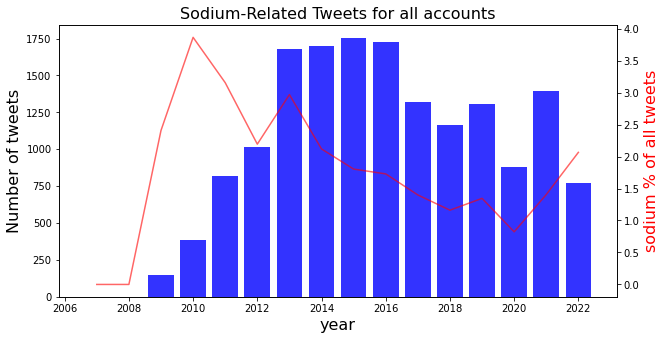

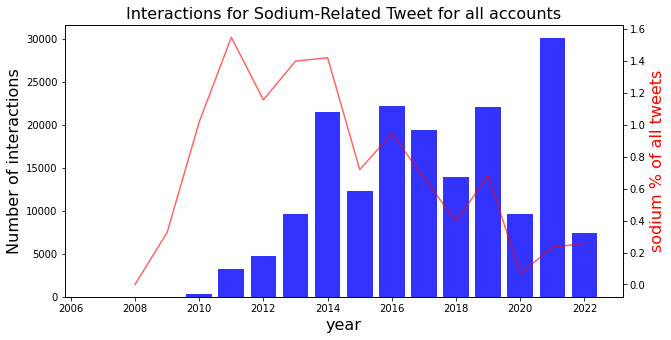

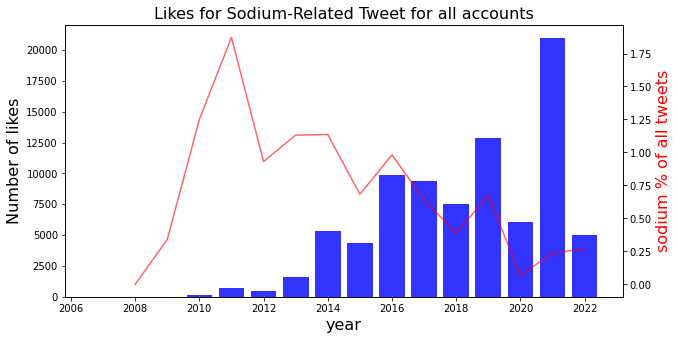

In [93]:
# plot sodium vs all
plot_counts(df_year, by=by, columns=['tweet_sodium_pct','tweet_sodium'],
           axis_labels=["sodium % of all tweets", "Number of tweets"],
           title="Sodium-Related Tweets for " + username + " accounts")
print(" ")
plot_counts(df_year, by=by, columns=['interactions_sodium_pct','interactions_sodium'],
           axis_labels=["sodium % of all tweets", "Number of interactions"],
           title="Interactions for Sodium-Related Tweet for " + username + " accounts")
print(" ")
plot_counts(df_year, by=by, columns=['popularity_sodium_pct','popularity_sodium'],
           axis_labels=["sodium % of all tweets", "Number of likes"],
           title="Likes for Sodium-Related Tweet for " + username + " accounts")

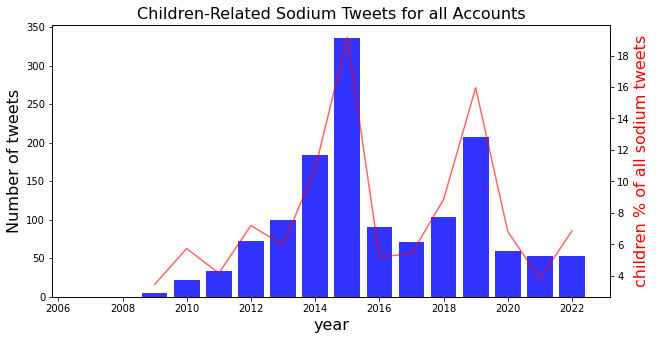

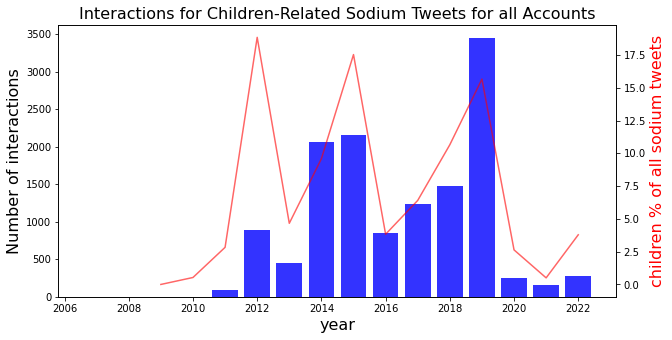

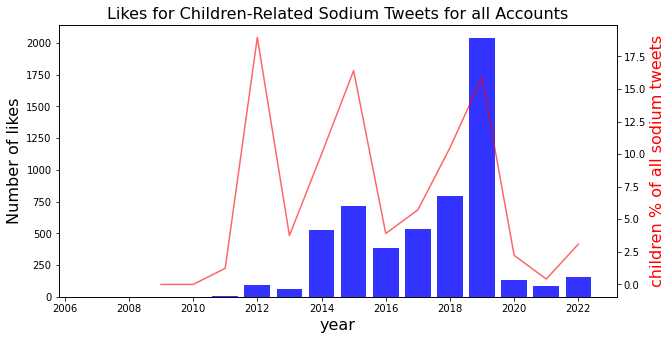

In [95]:
# plot children vs sodium
plot_counts(df_year, by=by, columns=['tweet_children_pct','tweet_children'],
           axis_labels=["children % of all sodium tweets", "Number of tweets"],
           title="Children-Related Sodium Tweets for " + username + " Accounts")
print(" ")
plot_counts(df_year, by=by, columns=['interactions_children_pct','interactions_children'],
           axis_labels=["children % of all sodium tweets", "Number of interactions"],
           title="Interactions for Children-Related Sodium Tweets for " + username + " Accounts")
print(" ")
plot_counts(df_year, by=by, columns=['popularity_children_pct','popularity_children'],
           axis_labels=["children % of all sodium tweets", "Number of likes"],
           title="Likes for Children-Related Sodium Tweets for " + username + " Accounts")

### By Year Month (not updated) 

In [ ]:
df_year = (df_all.groupby(["month"]).agg({
            'year': ['first'],
            'month': ['first'],
            'category': ["first"],
            'author_id': ['count'], 
            'retweet': ['sum'],
            'contain_sodium': ['sum'],
            'contain_children': ['sum'],
            'contain_lowincome': ['sum'],
            'interactions_count': ['sum'],
            'interactions_count_sodium': ['sum'],
            'interactions_count_children': ['sum'],
            'popularity': ['sum'],
            'popularity_sodium': ['sum'],
            'popularity_children': ['sum'],
            }))
df_year.columns = ["year", "month", "category", "tweet_total", "retweet_total",
                           "tweet_sodium", "tweet_children", "tweet_lowincome", 
                           "interactions_total","interactions_sodium", "interactions_children", 
                          "popularity_total","popularity_sodium","popularity_children"]
df_year['tweet_sodium_pct'] = df_year['tweet_sodium'] / df_year['tweet_total'] * 100
df_year['interactions_sodium_pct'] = df_year['interactions_sodium'] / df_year['interactions_total'] * 100
df_year['popularity_sodium_pct'] = df_year['popularity_sodium'] / df_year['popularity_total'] * 100
df_year['tweet_children_pct'] = df_year['tweet_children'] / df_year['tweet_total'] * 100
df_year['interactions_children_pct'] = df_year['interactions_children'] / df_year['interactions_total'] * 100
df_year['popularity_children_pct'] = df_year['popularity_children'] / df_year['popularity_total'] * 100
df_year.reset_index(inplace=True)
# df_grouped_year.to_csv("data/results/df_grouped_year.csv", index=False)

In [ ]:
df_year

In [ ]:
df_year[df_year.columns[df_year.columns.str.endswith("_pct")]].fillna(0, inplace=True)

In [ ]:
df_year

In [ ]:
# fill in some dates with missing 
missing_dates = []
years = []
months = []
for year in range(2009, 2022):
    for month in range(1, 13):
        t = str(year) + "-" + str(month)
        if t not in df_year['YearMonth'].tolist():
            print(t)
            missing_dates.append(t)
            years.append(year)
            months.append(month)

a = np.asarray(missing_dates).reshape(-1,1)
c = np.asarray(years).reshape(-1,1)
d = np.asarray(months).reshape(-1,1)
b = np.zeros((len(missing_dates), df_year.shape[1]-3))
df_missing = pd.DataFrame()
df_missing['YearMonth'] = missing_dates
df_missing['year'] = years
df_missing['month'] = months
df_missing['category'] = ["NA","NA"]
for col in df_year.columns[4:]:
    df_missing[col]=0
    
print(df_year.shape, df_missing.shape)
df_year = pd.concat([df_year, df_missing], axis=0)
print(df_year.shape)
df_year.reset_index(inplace=True)
df_year = df_year.sort_values(["year", "month"])

In [ ]:
# plot children vs sodium
plot_counts_YearMonth(df_year, by="YearMonth", columns=['tweet_children_pct','tweet_children'],
           axis_labels=["children % of all sodium tweets", "Number of tweets"],
           title="Children-Related Sodium Tweets for " + username + " Accounts")
print(" ")
plot_counts_YearMonth(df_year, by="YearMonth", columns=['interactions_children_pct','interactions_children'],
           axis_labels=["children % of all sodium tweets", "Number of interactions"],
           title="Interactions for Children-Related Sodium Tweets for " + username + " Accounts")
print(" ")
plot_counts_YearMonth(df_year, by="YearMonth", columns=['popularity_children_pct','popularity_children'],
           axis_labels=["children % of all sodium tweets", "Number of likes"],
           title="Likes for Children-Related Sodium Tweets for " + username + " Accounts")

## Hashtags 

In [96]:
df_hashtags_sodium = pd.read_csv("data/twitter/hashtags_sodium.csv")
df_hashtags = pd.read_csv("data/twitter/hashtags_all.csv")
df_hashtags_sodium_children = pd.read_csv("data/twitter/hashtags_sodium_children.csv")

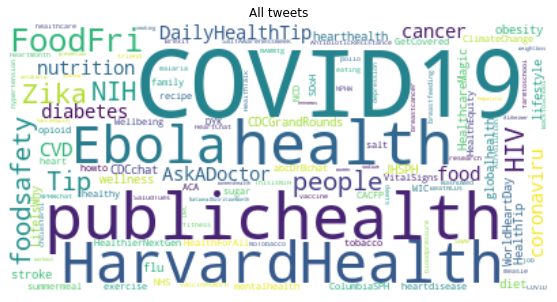

In [97]:
_ = get_wordcloud(df_hashtags["hashtags"], title="All tweets")

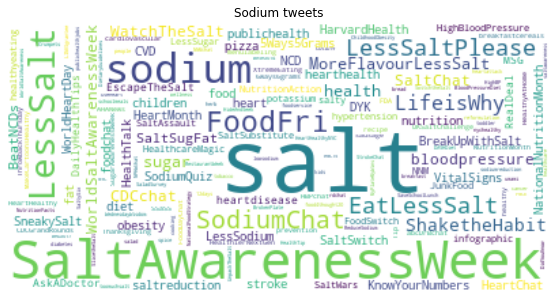

In [98]:
_ = get_wordcloud(df_hashtags_sodium["hashtags"], title="Sodium tweets")

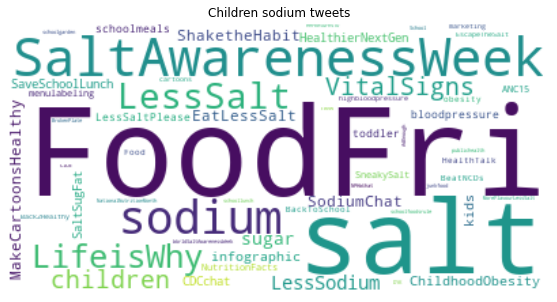

In [99]:
_ = get_wordcloud(df_hashtags_sodium_children["hashtags"], title="Children sodium tweets")

# Analysis 2: Tweet Interactions

In [92]:
os.chdir("/Users/lingchm/Documents/Github/us_sodium_policies")
df_graph_children = pd.read_csv("data/twitter/adjacency_matrix_sodium_children.csv", index_col=0)
df_graph_sodium = pd.read_csv("data/twitter/adjacency_matrix_sodium.csv", index_col=0)
df_graph = pd.read_csv("data/twitter/adjacency_matrix_all.csv", index_col=0)
usernames = df_graph.index.tolist()

In [100]:
df_by_user = pd.read_csv("data/twitter/users_summary.csv", index_col=0)
df_by_organization = pd.read_csv("data/twitter/organizations_summary.csv", index_col=0)

In [101]:
df_by_user.index= df_by_user['username']

In [95]:
df_by_user.columns

Index(['username', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'interactions_count', 'interactions_count_sodium',
       'interactions_count_children', 'popularity', 'popularity_sodium',
       'popularity_children', 'category', 'organization', 'tweet_total',
       'retweet_total', 'quote_total', 'dissemination_total', 'sodium_total',
       'retweet_sodium', 'quote_sodium', 'dissemination_sodium',
       'children_total', 'retweet_children', 'quote_children',
       'dissemination_children', 'original_pct', 'original_sodium_pct',
       'original_children_pct', 'dissemination_pct',
       'dissemination_sodium_pct', 'dissemination_children_pct', 'sodium_pct',
       'children_pct', 'influence_total', 'influence_sodium',
       'influence_children', 'id', 'name', 'location', 'created_at',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'year'],
      dtype='object')

## Followers vs Interactions

In [96]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [97]:
df_by_user[["followers_count","interactions_count", 'interactions_count_sodium','interactions_count_children']]

,followers_count,interactions_count,interactions_count_sodium,interactions_count_children
username,,,,
AHAScience,64594,62260.0,246.0,0.0
ASPCardio,5643,18284.0,10.0,0.0
American_Heart,308846,868972.0,26882.0,2109.0
BeAFoodHero,826,3411.0,6.0,0.0
BruceNeal1,919,968.0,271.0,4.0
...,...,...,...,...
kcferdmd,801,1769.0,0.0,0.0
nycHealthy,93814,422002.0,2843.0,26.0
theNAMedicine,34057,95571.0,0.0,0.0


In [103]:
t = df_by_user[~df_by_user.index.str.startswith("WHO")]
t = t[~t.index.str.startswith("DrTomFrieden")]
#t = df_by_user
t.shape

(64, 45)

reference:

https://www.earthinversion.com/statistics/maximum-likelihood-estimation-with-examples-in-python/

https://jekel.me/2016/Maximum-Likelihood-Linear-Regression/

https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/NMA2020/tutorials/W1D3_ModelFitting/student/W1D3_Tutorial2.ipynb#scrollTo=nZaM74Fixxwx


In [104]:
from scipy.stats import pearsonr

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.877
Date:                Fri, 12 Aug 2022   Prob (F-statistic):             0.0208
Time:                        17:20:43   Log-Likelihood:                -145.85
No. Observations:                  36   AIC:                             295.7
Df Residuals:                      34   BIC:                             298.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9949      2.654      4.142      0.0

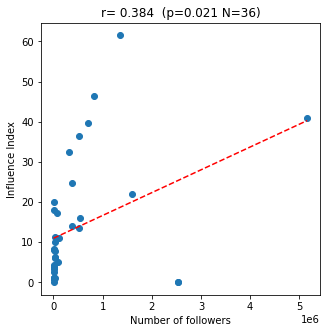

In [107]:
plt.rcParams["figure.figsize"] = (5,5)

y = np.asarray(t[~t["influence_children"].isnull()]["influence_children"])
X = np.asarray(t[~t["influence_children"].isnull()]["followers_count"])

# first fit OLS
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# find estimated residual
e=est2.resid
estd = np.std(e) 

slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
print("slope:", slope)
print("p:", p_value)

#sns.regplot(X, y)
#plt.show()


# correlation 
corr, p = pearsonr(X,y) 
print(f"Pearson corr: {corr}  \t p-value={p}") 

x = np.asarray([np.min(X), np.max(X)])
plt.scatter(X,y)
plt.xlabel("Number of followers")
plt.ylabel("Influence Index")
plt.plot(x, slope*x + intercept, "r--")
plt.title(f"r={corr: .3f}  (p={p:.3f} N={X.shape[0]})")
plt.show()


In [42]:
theta_hat_mle = (X @ y) / (X @ X)

In [23]:
theta_hat_mle

0.0017474725712349345

In [129]:
residual = y - (X * slope + intercept)

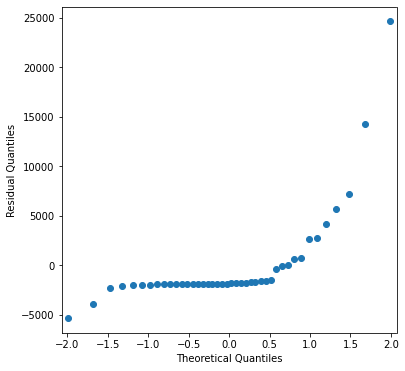

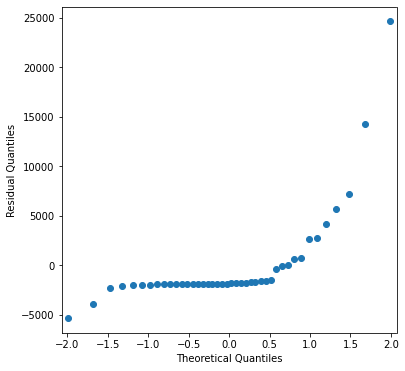

In [130]:
sm.qqplot(residual, ylabel = "Residual Quantiles" )

## echart

In [63]:
import pyecharts

In [64]:
from pyecharts.charts import Bar, Graph
from pyecharts.charts import Boxplot
from pyecharts import options as opts
import pandas as pd
from gapminder import gapminder

In [65]:
import seaborn as sns

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
def prepare_graph(df_graph, df_by_user, influence_col="influence_index_all",
                  filename = "data/results/graph_all_tweets.html",
                  title="All Tweets", EDGE_LABEL=True, EDGE_CURVE=True, GRAVITY=0.2, 
                    MIN_EDGE=2, MIN_NODE=10, MAX_EDGE=15, MAX_NODE=90, LAYOUT="circular", exclude_nodes=False):
    
    if influence_col is not None:
        df_by_user = df_by_user.sort_values(["category", influence_col], ascending=False)
    
    # scale node size
    scaler = MinMaxScaler(feature_range=(MIN_NODE,MAX_NODE))
    scaled_node_value = scaler.fit_transform(np.diagonal(df_graph).reshape(-1,1))
    scaled_node_value = pd.DataFrame(scaled_node_value, index=df_graph.index)

    # scale value 
    scaler = MinMaxScaler(feature_range=(MIN_EDGE,MAX_EDGE))
    df_graph_scaled = np.asarray(df_graph.copy())
    for i in range(df_graph_scaled.shape[0]):
        df_graph_scaled[i,i] = 0
    df_graph_scaled = df_graph_scaled.reshape(df_graph.shape[0]*df_graph.shape[1], 1)
    df_graph_scaled = scaler.fit_transform(df_graph_scaled)
    df_graph_scaled = df_graph_scaled.reshape(df_graph.shape[0], df_graph.shape[1])
    df_graph_scaled = pd.DataFrame(df_graph_scaled, columns=df_graph.columns, index=df_graph.index)

    # orags 
    organizations = df_by_user.index.tolist()
    for name in df_graph.index.tolist():
        if name not in organizations:
            print("dropping", name)
            df_graph.drop([name], axis=0, inplace=True)
            df_graph.drop([name], axis=1, inplace=True)

    #categories = []
    #for category in np.unique(df_by_user['category']).tolist():
    #    categories.append({"name": category})
    #categories
    categories = [
     {'name': 'Experts'},
     {'name': 'Individual influencers'},
     {'name': 'International influencers'},
     {'name': 'Professional and advocacy assotiations'},
     {'name': 'Public agencies'},
     {'name': 'Research and evaluation organization'}]

    nodes = []
    for i in range(df_by_user.shape[0]): 
        from_ = df_by_user.index.tolist()[i]
        if exclude_nodes:
            if (df_graph.loc[from_,from_] > 0) and ((np.sum(df_graph.loc[from_]) + np.sum(df_graph.loc[:,from_]) - 2 * df_graph.loc[from_,from_]) > 0):
                organization = df_by_user.iloc[i].name
                category = df_by_user.loc[organization, "category"]
                if influence_col is not None:
                    if df_by_user.loc[organization, influence_col] >= 0:
                        influence = " (" + str(round(df_by_user.loc[organization, influence_col])) + ")"
                    else:
                        influence = " (-)"
                else:
                    influence = ""
                for j in range(len(categories)):
                    if category == categories[j]["name"]:
                        category_id = j
                        #print(username, df_by_user.loc[username, "category"], j)

                nodes.append({"id": str(i), 
                          "name": organization + influence,
                          "category": category_id,
                          "value": df_graph.loc[from_,from_],
                          "symbolSize": round(scaled_node_value.loc[from_][0], 6)})

    links = []
    for i in range(len(df_by_user.index.tolist())):
        for j in range(len(df_by_user.index.tolist())):
            from_ = df_by_user.index.tolist()[i]
            to_ = df_by_user.index.tolist()[j]
            val = df_graph.loc[from_,to_]
            width = df_graph_scaled.loc[from_,to_]
            if val > 0 and from_ != to_:
                if EDGE_CURVE: curveness = round((from_[0] < to_[0]) * 0.1 + 0.2, 1)
                else: curveness = 0
                links.append({"source": str(i), "target": str(j), 
                              "name": val,
                              "value": val, 
                              "lineStyle": {
                                  "normal": {
                                       "width": width,
                                       "curveness": curveness,
                                       "color": "source"
                                  }
                              },
                              "label": {
                                  "show": EDGE_LABEL,
                                  "fontWeight": "bold",
                                  "formatter": "{}".format(round(val))
                              }
                             })

    categories[3]["name"] = 'Professional and \n advocacy assotiations'
    categories[5]["name"] = 'Research and evaluation \n organization'
    
    c = (
    Graph(init_opts=opts.InitOpts(width="1300px", height="1000px"))
    .add(
        "",
        nodes=nodes,
        links=links,
        categories=categories,
        is_focusnode = False, 
        layout=LAYOUT, # force 
        gravity = GRAVITY,
        edge_symbol=['','arrow'],
        is_rotate_label=True,
        edge_label=opts.LabelOpts(is_show=False, position="middle"), #, formatter="{b} interactions"),
        #linestyle_opts=opts.LineStyleOpts(color="source"), #,opacity=0.5
        label_opts=opts.LabelOpts(position="right"),
        #legend_pos=
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title=title),
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="2%", pos_top="20%"),
        
    )
    .render(filename)
    #.render_notebook()
)
    return 

<AxesSubplot:>

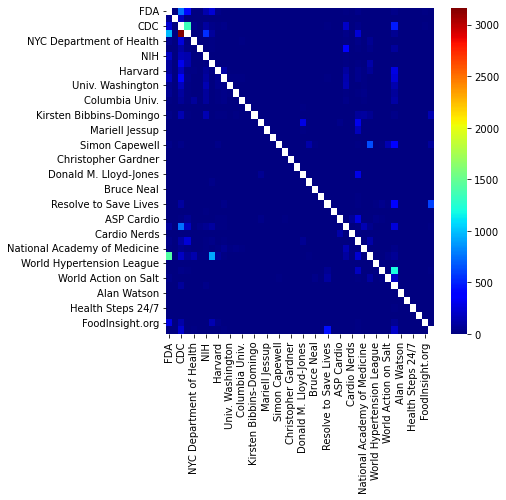

In [160]:
mask = np.diag(np.ones((df_graph.shape[0])))
sns.heatmap(df_graph, cmap="jet", mask=mask)

In [70]:
df_by_organization.sort_values(["tweet_total"], ascending=False).iloc[:5]["tweet_total"]

organization
Simon Capewell    83874
WHO               70009
CDC               68447
Harvard           65685
USDA              63713
Name: tweet_total, dtype: int64

In [14]:
df_by_organization.sort_values(["sodium_total"], ascending=False).iloc[:5]["sodium_total"]

organization
World Action on Salt                         7953
Center for Science in the Public Interest    1631
American Heart Association                   1321
HHS                                           701
Healthy Heart Market                          584
Name: sodium_total, dtype: int64

In [15]:
df_by_organization.sort_values(["children_total"], ascending=False).iloc[:5]["children_total"]

organization
World Action on Salt                         556
Center for Science in the Public Interest    318
USDA                                         105
American Heart Association                    96
HHS                                           70
Name: children_total, dtype: int64

In [31]:
prepare_graph(df_graph, df_by_organization, influence_col = "influence_total",
                  filename = "data/results/graph_all_tweets.html",
                  title="All Tweets", MIN_EDGE=0.2, MAX_EDGE=20, EDGE_LABEL=False)

In [32]:
prepare_graph(df_graph_sodium, df_by_organization, influence_col = "influence_sodium",
                  filename = "data/results/graph_sodium_tweets.html",
                  title="Sodium Tweets",MIN_EDGE=0.5, MAX_EDGE=8, EDGE_LABEL=False)

In [73]:
prepare_graph(df_graph_children, df_by_organization, influence_col = "influence_children",
                  filename = "data/results/graph_sodium_children_tweets.html",
                  title="Children-related Sodium Tweets", MIN_EDGE=0.5, MAX_EDGE=8, EDGE_LABEL=False)

In [75]:
df_by_organization

,tweet_total,retweet_total,quote_total,dissemination_total,retweet_count,reply_count,like_count,quote_count,interactions_count,interactions_count_sodium,...,sodium_pct,children_pct,influence_total,influence_sodium,influence_children,min_year,PageRank_all_x,PageRank_all_y,PageRank_sodium,PageRank_children
organization,,,,,,,,,,,,,,,,,,,,,
ASP Cardio,8205,3631.0,4994,7933,4832.0,403.0,12539.0,510.0,18284.0,10.0,...,0.003778,0.000000,3.997376,0.714286,NaN,2011,0.021615,0.021615,0.022050,0.006594
Alan Watson,25429,4847.0,7908,11705,158168.0,28027.0,467999.0,14734.0,668928.0,6130.0,...,0.007983,0.000590,32.500632,38.553459,6.307692,2009,0.010344,0.010344,0.004032,0.006594
American Heart Association,50874,9153.0,17606,24884,420747.0,27572.0,459706.0,23207.0,931232.0,27128.0,...,0.025966,0.001887,22.320462,26.544031,32.446154,2009,0.043702,0.043702,0.064967,0.082603
American Public Health Association,25831,7407.0,10072,15658,175999.0,8469.0,138110.0,9348.0,331926.0,833.0,...,0.001936,0.000542,18.015957,20.317073,36.333333,2007,0.030337,0.030337,0.027701,0.059340
Bruce Neal,369,189.0,72,246,314.0,37.0,599.0,18.0,968.0,271.0,...,0.173442,0.013550,5.377778,6.452381,1.000000,2012,0.011340,0.011340,0.018347,0.006594
CDC,68447,19342.0,27465,43932,2134885.0,671581.0,3064886.0,348068.0,6219420.0,5790.0,...,0.003711,0.000745,126.655534,32.346369,32.852941,2008,0.040665,0.040665,0.059298,0.109446
Cardio Nerds,7490,5373.0,1958,6727,8356.0,1752.0,30236.0,2091.0,42435.0,222.0,...,0.000801,0.000000,20.044875,111.000000,NaN,2019,0.016704,0.016704,0.004032,0.006594
Center for Science in the Public Interest,40225,9520.0,15705,23445,104677.0,10365.0,81411.0,5195.0,201648.0,9176.0,...,0.040547,0.007906,6.567269,7.042210,7.715447,2011,0.030504,0.030504,0.061402,0.111643
Cheryl Anderson,277,56.0,105,145,241.0,63.0,1781.0,36.0,2121.0,42.0,...,0.014440,0.000000,9.597285,14.000000,NaN,2013,0.016468,0.016468,0.010107,0.006594


authority scores by pagerank

In [34]:
import networkx as nx

In [35]:
def run_PageRank(df_graph, df_by_user):
    G = nx.Graph()
    for i in range(len(df_by_user.index.tolist())):
        from_ = df_by_user.index.tolist()[i]
        G.add_node(from_)
        for j in range(len(df_by_user.index.tolist())):
            to_ = df_by_user.index.tolist()[j]
            val = df_graph.loc[from_,to_]
            if val > 0 and from_ != to_:
                val = 1
                G.add_weighted_edges_from([(from_,to_,val)])
    res = pd.DataFrame.from_dict(nx.pagerank(G), orient="index")
    res.columns = ["PageRank"]
    res = res.sort_values("PageRank", ascending=False)
    return res, G

In [41]:
res_all, G = run_PageRank(df_graph, df_by_user)
res_all.columns = ["PageRank_all"]
res_all.index.name = "organization"
res_all.iloc[:5]

,PageRank_all
organization,
American Heart Association,0.043702
CDC,0.040665
WHO,0.039783
FDA,0.038951
NIH,0.034851


In [131]:
df_by_organization = df_by_organization.merge(res_all, on="organization", how="left")

In [132]:
res_sodium, G = run_PageRank(df_graph_sodium, df_by_user)
res_sodium.columns = ["PageRank_sodium"]
res_sodium.index.name = "organization"
res_sodium.iloc[:5]

,PageRank_sodium
organization,
FDA,0.080079
World Action on Salt,0.068026
American Heart Association,0.064967
Center for Science in the Public Interest,0.061402
CDC,0.059298


In [133]:
df_by_organization = df_by_organization.merge(res_sodium, on="organization", how="left")

In [134]:
res_children, G = run_PageRank(df_graph_children, df_by_user)
res_children.columns = ["PageRank_children"]
res_children.index.name = "organization"
res_children.iloc[:10]

,PageRank_children
organization,
Center for Science in the Public Interest,0.111643
CDC,0.109446
World Action on Salt,0.092658
American Heart Association,0.082603
USDA,0.072079
American Public Health Association,0.059340
Simon Capewell,0.051388
HHS,0.050458
FDA,0.024523


In [135]:
df_by_organization = df_by_organization.merge(res_children, on="organization", how="left")

In [144]:
for organization in df_graph.index.tolist():
    df_graph.loc[organization, organization] = res_all.loc[organization][0]
    df_graph_sodium.loc[organization, organization] = res_sodium.loc[organization][0]
    df_graph_children.loc[organization, organization] = res_children.loc[organization][0]

In [147]:
df_graph.to_csv("data/results/adjacency_matrix_all_pagerank.csv")
df_graph_sodium.to_csv("data/results/adjacency_matrix_sodium_pagerank.csv")
df_graph_children.to_csv("data/results/adjacency_matrix_children_pagerank.csv")

In [49]:
df_by_organization.to_csv("data/twitter/organizations_summary.csv")

In [174]:
prepare_graph(df_graph, df_by_organization, influence_col=None,
                  filename="data/results/graph_tweets_force.html",
                  title="Sodium Tweets", EDGE_CURVE=False,GRAVITY=0.8,
                 MIN_EDGE=0.2, MAX_EDGE=10, MIN_NODE=3, MAX_NODE=15, EDGE_LABEL=False, LAYOUT="force",
                 exclude_nodes=True)

In [172]:
prepare_graph(df_graph_sodium, df_by_organization, influence_col=None,
                  filename="data/results/graph_sodium_tweets_force.html",
                  title="Sodium Tweets", EDGE_CURVE=False,GRAVITY=0.8,
                 MIN_EDGE=1, MAX_EDGE=8, MIN_NODE=3, MAX_NODE=15, EDGE_LABEL=False, LAYOUT="force",
                 exclude_nodes=True)

In [170]:
prepare_graph(df_graph_children, df_by_organization, influence_col=None,
                  filename="data/results/graph_sodium_children_tweets_force.html",
                  title="Children-related Sodium Tweets", EDGE_CURVE=False,GRAVITY=0.8,
                 MIN_EDGE=1, MAX_EDGE=8, MIN_NODE=3, MAX_NODE=15, EDGE_LABEL=False, LAYOUT="force",
                 exclude_nodes=True)

In [171]:
prepare_graph(df_graph_children, df_by_organization, influence_col=None,
                  filename="data/results/graph_sodium_children_tweets_force2.html",
                  title="Children-related Sodium Tweets", EDGE_CURVE=False,GRAVITY=0.1,
                 MIN_EDGE=1, MAX_EDGE=8, MIN_NODE=3, MAX_NODE=15, EDGE_LABEL=False, LAYOUT="force",
                 exclude_nodes=True)

## NXVIZ

In [ ]:
os.chdir("/Users/lingchm/Documents/Github/nxviz")
from nxviz.plots import *
from nxviz.annotate import *
from nxviz.api import *
import nxviz as nv

In [ ]:
# create graph object
A = np.asarray(df_graph_sodium)
for i in range(A.shape[0]):
    A[i,i] = 0
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
nx.draw(G)

In [ ]:
df_by_user.columns

In [ ]:
# add group to each node
for i in range(len(usernames)):
    G.nodes[i]["category"] = df_by_user.loc[usernames[i], "category"]
    G.nodes[i]["tweets"] = df_by_user.loc[usernames[i], "tweet_sodium"]

In [ ]:
weight = 10 

# add weights to each edge:
for i in range(len(usernames)):
    for j in range(len(usernames)):
        if df_graph_sodium.iloc[i,j] > 0: 
            G.edges[i,j]["weight"] = weight
            G.edges[i,j]["interactions"] = int(df_graph_sodium.loc[usernames[i], usernames[j]])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.facecolor'] = 'white'

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
plt.title("Sodium-related tweets")

ax = nv.circos(
    G,
    group_by="category",
    sort_by="tweets",
    node_color_by="category",
    node_alpha_by = "tweets",
    #node_size_by="tweets",
    edge_color_by="source_node_color",
    #group_label_position="middle",
    #nodeprops ={"radius":5},
    #node_label_layout="rotation",
    #edge_width = "weight",
    #edge_alpha_by="interactions"
)

circos_group(G, group_by="category")
circos_labels(G, group_by="category",
    sort_by="tweets",
    layout="node_center") # standard 
#node_labels(G)

In [ ]:
pd.DataFrame(usernames)

In [ ]:
CircosPlot(G, 
            node_grouping="category",
            node_color="category", 
            node_order="category",
            node_alpha="tweets",
            edge_color="source_node_color",
            #edge_alpha="interactions")
            #node_labels=True
          )

plt.show()